In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
veriler = pd.read_csv("Ads_CTR_Optimisation.csv")
veriler

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


In [42]:
import random

In [43]:
# N = 10000
# d = 10
# toplam = 0
# secilenler = []

In [44]:
# for n in range(0,N):
#     ad = random.randrange(d)
#     secilenler.append(ad)
#     odul = veriler.values[n,ad]
#     toplam = toplam + odul

In [45]:
# plt.hist(secilenler)

In [46]:
# toplam # Rastgele bir seçim yaptık ve 1216 sonucunu aldık. Bu en kötü sonuç olabilir çünkü rastgele

UCB

In [47]:
import math

In [48]:
N = 10000 
d = 10
oduller = [0] * d # En başta bütün ilanların ödülü 0
tiklamalar = [0] * d # O ana kadarki tıklamalar
toplam = 0
secilenler = []

In [49]:
for n in range(1,N):
    ad = 0
    max_ucb = 0
    for i in range(0,d):
        if (tiklamalar[i]) > 0:
            ortalama = oduller[i]/ tiklamalar[i]
            delta = math.sqrt(3/2 * math.log(n)/tiklamalar[i]) # UCB hesaplanması
            ucb = ortalama + delta
        else:
            ucb = N*10 # sadece büyük bir değer verdik
        if max_ucb < ucb:
            max_ucb = ucb
            ad = i
        secilenler.append(ad)
        tiklamalar[ad] = tiklamalar[ad] + 1
        odul = veriler.values[n,ad] # verilerdeki n. satır = 1 ise odul 1
        oduller[ad] = oduller[ad]+ odul
        toplam = toplam + odul
print("Toplam ödül: ",toplam)

Toplam ödül:  22114


(array([32743.,  3039.,  1171.,  3070., 56136.,   216.,   395.,  2598.,
          390.,   232.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

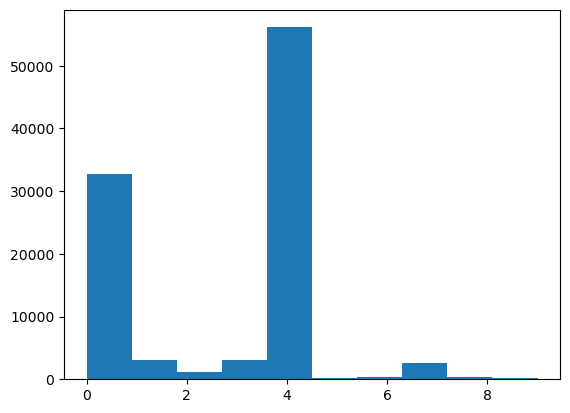

In [50]:
plt.hist(secilenler)